In [8]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

In [3]:
def find_files(directory, substring, extension):
    # 存储符合条件的文件路径
    matching_files = []
    # 遍历给定目录及其所有子目录
    for root, dirs, files in os.walk(directory):
        # 检查每个文件
        for file in files:
            # 检查文件名是否包含特定子字符串并且以特定扩展名结尾
            if substring in file and file.endswith(extension):
                # 如果符合条件，添加完整路径到列表
                matching_files.append(os.path.join(root, file))
    return matching_files

In [4]:
save_path = '/data/twang15/spatial_protein/CODEX_data/hubmap/multi_inte/thymus'
os.makedirs(save_path, exist_ok=True)
# tissues = adata.obs['Tissue'].drop_duplicates().tolist()
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/thymus', 'integrated', '.h5ad')


In [6]:
adata_sc = sc.read_h5ad('/data/twang15/spatial_protein/CODEX_data/hubmap/scRNA/thymus/high_variable_gene_thymus.h5ad')

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
sc.pp.neighbors(adata_sc, n_neighbors=10, n_pcs=40)

2024-05-24 11:16:19.836254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 11:16:21.540030: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-24 11:16:22.097999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/twang15/alleleCount-4.2.1/lib/
2024-05-24 11:16:22.098035: I tensorflow/compi

In [8]:
sc.tl.umap(adata_sc)

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


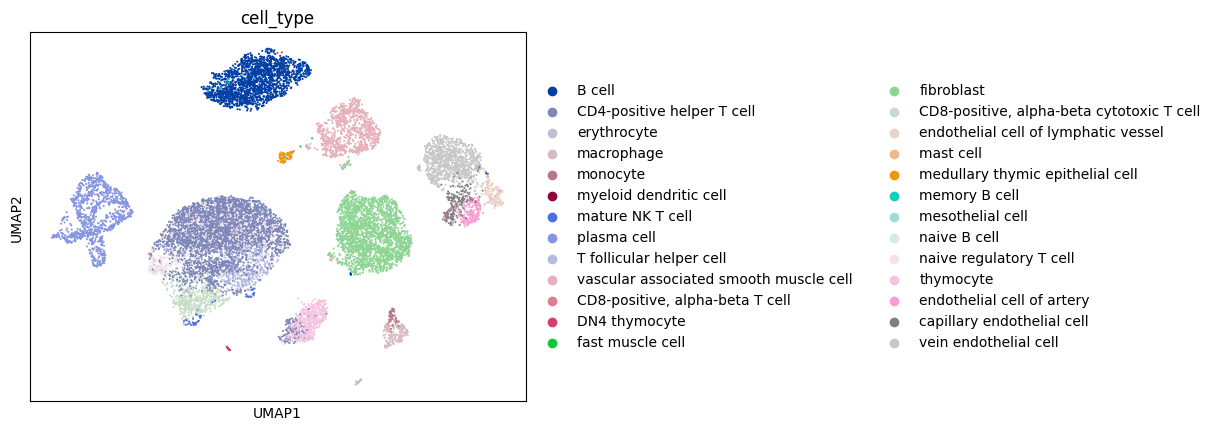

In [12]:
sc.pl.umap(adata_sc, color=['cell_type'], show=False)

plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/multi_inte/thymus/sc_celltype_umap.png', bbox_inches='tight')

In [24]:
tmp = sc.read_h5ad('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/thymus/HBM353.PBPQ.757_reg1_protein_integrated.h5ad')

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [26]:
tmp.obs['neighborhood10']

KeyError: 'neighborhood10'

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


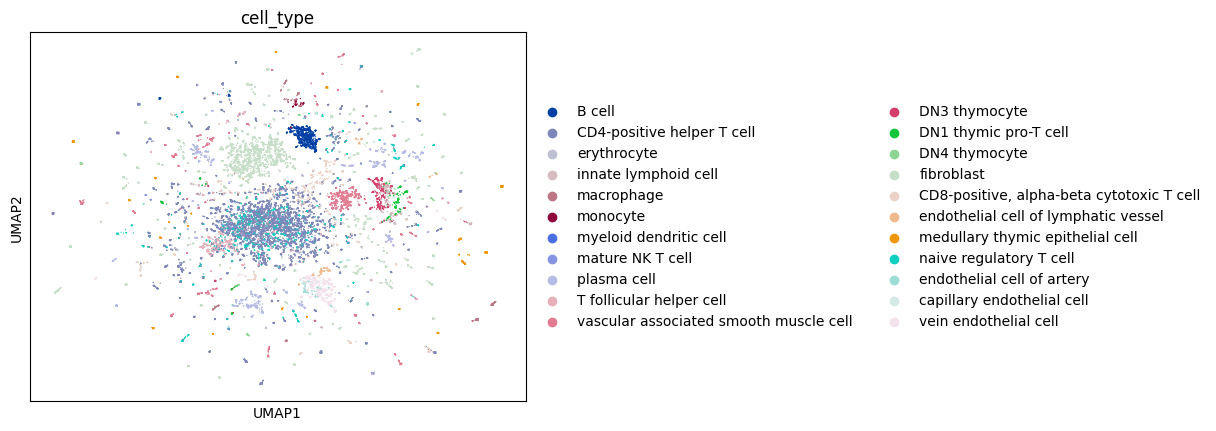

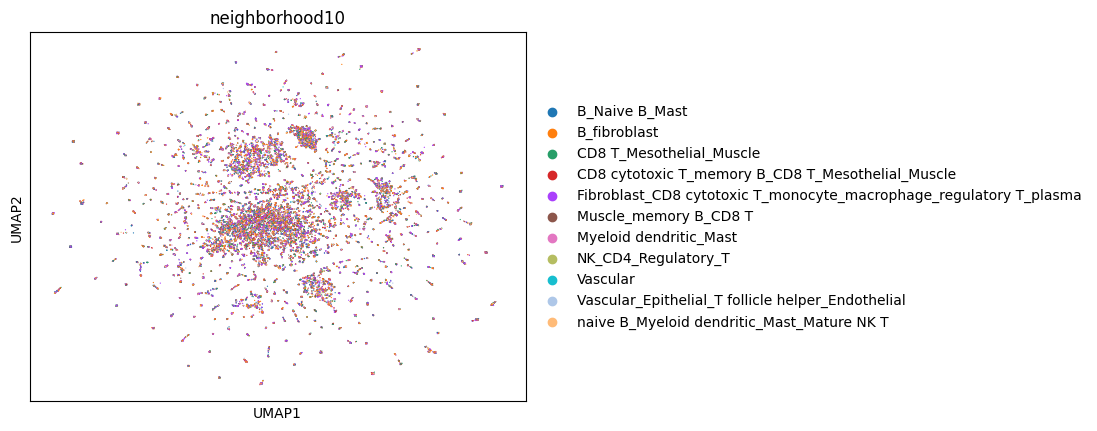

In [6]:
tissue = files[0].split('/')[8].replace('_protein_integrated.h5ad', '')
tmp = sc.read_h5ad(files[0])
sc.pp.neighbors(tmp, n_neighbors=300, n_pcs=20)
sc.tl.umap(tmp)
sc.pl.umap(tmp, color=['cell_type'], show=False)
os.makedirs(f'{save_path}/{tissue}/', exist_ok=True)
plt.savefig(f'{save_path}/{tissue}/protein_celltype_umap.png', bbox_inches='tight')
sc.pl.umap(tmp, color=['neighborhood10'], show=False)
plt.savefig(f'{save_path}/{tissue}/protein_neighbor_umap.png', bbox_inches='tight')

In [9]:
for file in tqdm(files):
    tissue = file.split('/')[8].replace('_protein_integrated.h5ad', '')
    os.makedirs(f'{save_path}/{tissue}/', exist_ok=True)
    tmp = sc.read_h5ad(file)
    sc.pp.neighbors(tmp, n_neighbors=300, n_pcs=20)
    sc.tl.umap(tmp)
    sc.pl.umap(tmp, color=['cell_type'], show=False)
    os.makedirs(f'{save_path}/{tissue}/', exist_ok=True)
    plt.savefig(f'{save_path}/{tissue}/protein_celltype_umap.png', bbox_inches='tight')
    sc.pl.umap(tmp, color=['neighborhood10'], show=False)
    plt.savefig(f'{save_path}/{tissue}/protein_neighbor_umap.png', bbox_inches='tight')
    plt.close()

  0%|          | 0/12 [00:00<?, ?it/s]/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
  8%|▊         | 1/12 [03:57<43:36, 237.86s/it]/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/twang15/mamba/envs/imc/lib/python3.8/site-pack

In [28]:
full_matching = pd.read_csv('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/thymus/matching.tsv', sep='\t', index_col='Unnamed: 0')
rna_adata = sc.read_h5ad('/data/twang15/spatial_protein/CODEX_data/hubmap/scRNA/thymus/cellxgene_thymus.h5ad')
protein_adata = sc.read_h5ad("/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/thymus/combined_protein.h5ad")
cells = pd.read_csv('/data/twang15/spatial_protein/CODEX_data/hubmap/neighbor/thymus/cells.tsv', sep='\t', index_col='Unnamed: 0')

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [33]:
cells.shape

(827862, 86)

In [31]:
protein_inte = protein_adata[full_matching['mod2_indx']].copy()
protein_inte.obs['neighborhood10'] = cells['neighborhood10'].tolist()

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [32]:
protein_inte.obs

,Cell K-Means [Mean] Expression,Cell K-Means [Covariance] Expression,Cell K-Means [Total] Expression,Cell K-Means [Mean-All-SubRegions] Expression,Cell K-Means [Shape-Vectors],Cell K-Means [Texture],Cell K-Means [tSNE_All_Features],Nuclei K-Means [Mean] Expression,Nuclei K-Means [Covariance] Expression,Nuclei K-Means [Total] Expression,...,Nucleus Boundaries K-Means [Covariance] Expression,Nucleus Boundaries K-Means [Total] Expression,Nucleus Boundaries K-Means [Mean-All-SubRegions] Expression,Nucleus Boundaries K-Means [Shape-Vectors],Nucleus Boundaries K-Means [Texture],Nucleus Boundaries K-Means [tSNE_All_Features],Tissue,x,y,neighborhood10
ID,,,,,,,,,,,,,,,,,,,,,
84,4,2,1,2,1,1,2,2,1,1,...,3,1,2,1,1,2,HBM857.ZBDC.975_reg1,5215.223844,18.452555,B_Naive B_Mast
96,4,2,1,2,1,1,4,2,1,1,...,3,1,2,1,1,4,HBM857.ZBDC.975_reg1,10434.185731,21.357895,B_Naive B_Mast
101,4,2,1,2,1,1,4,2,1,3,...,3,4,2,1,1,4,HBM857.ZBDC.975_reg1,5078.948267,23.292826,CD8 cytotoxic T_memory B_CD8 T_Mesothelial_Muscle
108,4,2,1,2,3,1,5,2,1,1,...,3,1,2,3,1,5,HBM857.ZBDC.975_reg1,5391.100164,25.209633,CD8 cytotoxic T_memory B_CD8 T_Mesothelial_Muscle
109,4,2,1,2,1,1,5,2,1,1,...,3,1,2,1,1,5,HBM857.ZBDC.975_reg1,6082.322440,25.151053,Muscle_memory B_CD8 T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1,1,3,2,2,1,2,3,1,3,...,1,3,2,2,1,2,HBM632.JSNP.578_reg001,4450.394142,3433.680386,CD8 cytotoxic T_memory B_CD8 T_Mesothelial_Muscle
27074,3,1,1,3,1,1,2,7,1,2,...,1,2,3,1,1,2,HBM632.JSNP.578_reg001,4259.356322,3436.100164,Vascular
27075,2,1,3,6,3,1,3,5,1,1,...,1,1,6,3,1,3,HBM632.JSNP.578_reg001,1562.925617,3437.373228,Muscle_memory B_CD8 T


In [36]:
tmp = sc.read_h5ad('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/thymus/HBM353.PBPQ.757_reg1_protein_integrated.h5ad')

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
from tqdm import tqdm
protein_inte = protein_adata[full_matching['mod2_indx']].copy()
protein_inte.obs['neighborhood10'] = cells['neighborhood10'].tolist()
full_matching['Tissue'] = protein_inte.obs['Tissue'].tolist()
# 获取 unique 的 Tissue 列表
tissues = protein_inte.obs['Tissue'].drop_duplicates().tolist()

# 提前分组
full_matching_grouped = full_matching.groupby('Tissue')

for tissue in tqdm(tissues):
    pro = protein_inte[protein_inte.obs['Tissue'] == tissue]
    full_m = full_matching_grouped.get_group(tissue)
    
    rna_adata_for_integrated = rna_adata[full_m['mod1_indx']].copy()
    
    protein_integrated = rna_adata_for_integrated.copy()
    pro.obs_names = protein_integrated.obs_names
    protein_integrated.obs = pd.concat([protein_integrated.obs, pro.obs], axis=1)
    
    protein_integrated.write_h5ad(f'/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/thymus/{tissue}_protein_integrated.h5ad')

/data/twang15/mamba/envs/imc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
100%|██████████| 12/12 [15:55<00:00, 79.62s/it] 
